In [253]:
from paBont_analysis_class import Eopn3_Ephys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [254]:
paBont2_nwb_path = r"C:/Users/denmanlab/Desktop/nwb/pa_Bont2_nwb"
# 2023-09-29_16-07-39_PaBont2
paBont2 = Eopn3_Ephys(paBont2_nwb_path)

In [255]:
directory_path = r"G:/Grant/rotation/2023-09-29_16-07-39_PaBont2/data1/dataframes/luminance_flash/"
paBont2.combine_specific_df('luminance_flash',directory_path )

AttributeError: 'Eopn3_Ephys' object has no attribute 'combine_specific_df'

In [237]:
file_path = r"G:\Grant\rotation\2023-09-29_16-07-39_PaBont2\plots\data1\dataframes\luminance_flash\luminance_flash_combined_df.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,unit,epoch,probe,brain_region,window,post_stimulus_startTime_(ms),post_stimulus_endTime_(ms),window_size_(ms),avg_firing_rate_in_window_non_opto,avg_firing_rate_in_window_opto,changeHz,spikes_per_trial-Non-opto,spikes_per_trial-opto,actual_window_non_opto,actual_window_opto,adjusted_trial_window_non_opto,adjusted_trial_window_opto
0,29,luminance_flash,A,V1,base1,-300.0,-200.0,100.0,0.4,0.10,-0.30,"[[], [3574.1997252467845], [], [], [], [], [],...","[[], [], [], [], [], [6835.216015974869], [], ...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.5264666666667, 3571.6264666666666], [35...","[[6820.0208999999995, 6821.1209], [6823.019866..."
1,32,luminance_flash,A,V1,base1,-300.0,-200.0,100.0,0.0,0.30,0.30,"[[3629.2553374850354, 3629.2592080121462, 3933...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.5264666666667, 3571.6264666666666], [35...","[[6820.0208999999995, 6821.1209], [6823.019866..."
2,34,luminance_flash,A,V1,base1,-300.0,-200.0,100.0,0.0,1.60,1.60,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [6824.113798390435], [], [], [6832.082223...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.5264666666667, 3571.6264666666666], [35...","[[6820.0208999999995, 6821.1209], [6823.019866..."
3,35,luminance_flash,A,V1,base1,-300.0,-200.0,100.0,0.0,3.40,3.40,"[[], [3574.286311607651, 3574.4007257238204, 3...","[[6820.072455865549, 6820.1107941063, 6820.254...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.5264666666667, 3571.6264666666666], [35...","[[6820.0208999999995, 6821.1209], [6823.019866..."
4,38,luminance_flash,A,V1,base1,-300.0,-200.0,100.0,1.4,0.00,-1.40,"[[], [], [3576.8716897890504], [3579.613024448...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.5264666666667, 3571.6264666666666], [35...","[[6820.0208999999995, 6821.1209], [6823.019866..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2163,luminance_flash,C,LP,trough,160.0,200.0,40.0,1.0,2.25,1.25,"[[3571.189990824876], [], [], [], [], [], [], ...","[[6821.186464956356], [6823.499344201086, 6823...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.9864666666667, 3572.0264666666667], [35...","[[6820.4809, 6821.5208999999995], [6823.479866..."
2018,2164,luminance_flash,C,LP,trough,160.0,200.0,40.0,0.0,0.00,0.00,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.9864666666667, 3572.0264666666667], [35...","[[6820.4809, 6821.5208999999995], [6823.479866..."
2019,2165,luminance_flash,C,LP,trough,160.0,200.0,40.0,0.0,1.75,1.75,"[[3606.4776747480346, 3725.737318863497, 3859....","[[6820.983161679526], [6823.905416887541, 6823...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.9864666666667, 3572.0264666666667], [35...","[[6820.4809, 6821.5208999999995], [6823.479866..."
2020,2166,luminance_flash,C,LP,trough,160.0,200.0,40.0,0.0,1.25,1.25,"[[], [], [], [], [], [], [], [], [], [], [], [...","[[6820.585119641147, 6820.746380870278, 6820.7...","[[3570.826466666667, 3573.829201683502], [3573...","[[6820.3209, 6823.323696969696], [6823.3198666...","[[3570.9864666666667, 3572.0264666666667], [35...","[[6820.4809, 6821.5208999999995], [6823.479866..."


In [241]:
response_df = pd.read_csv(r'G:\Grant\rotation\2023-09-29_16-07-39_PaBont2\plots\data1\dataframes\luminance_flash\luminance_flash_combined_df_response.csv')
response_df

,unit,inital_response_peak_normalized,secondary_trough_response_normalized
0,29,-0.230769,-1.000000
1,32,NaN,NaN
2,34,1.000000,1.000000
3,35,1.000000,1.000000
4,38,0.594203,0.111111
...,...,...,...
2017,2163,0.186441,-0.090909
2018,2164,NaN,NaN
2019,2165,NaN,NaN
2020,2166,NaN,NaN


In [246]:
import scipy.stats as stats
import pandas as pd

# Assuming df1 is DataFrame1 and df2 is DataFrame2
df1 = df # your DataFrame1
df2 = response_df # your DataFrame2


# Let's say we want to compare the firing rates for unit 29 during the luminance_flash epoch:
for unit in df1['unit'].unique():

    unit_data = df1[df1['unit'] == unit]

    # Now we have the data for unit 29, we can perform a t-test to compare the firing rates:
    t_stat, p_value = stats.ttest_rel(unit_data['avg_firing_rate_in_window_non_opto'], unit_data['avg_firing_rate_in_window_opto'], nan_policy='omit')

    #create dataframe to store results
    results = pd.DataFrame(columns=['unit', 't_stat', 'p_value'])
    #add results to dataframe
    results = results.append({'unit': unit, 't_stat': t_stat, 'p_value': p_value}, ignore_index=True)

    # print(f'T-statistic: {t_stat}, p-value: {p_value}')
results


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_17872\3255866784.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'unit': unit, 't_stat': t_stat, 'p_value': p_value}, ignore_index=True)
C:\Users\denmanlab\AppData\Local\Temp\ipykernel_17872\3255866784.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'unit': unit, 't_stat': t_stat, 'p_value': p_value}, ignore_index=True)
C:\Users\denmanlab\AppData\Local\Temp\ipykernel_17872\3255866784.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'unit': unit, 't_stat': t_stat, 'p_value': p_value}, ignore_index=True)
C:\Users\denmanlab\AppData\Local\Temp\ipykernel_17872\3255866784.py:20: FutureWarning

,unit,t_stat,p_value
0,2168.0,-3.571429,0.07024


In [214]:
# Assuming unit59 is your DataFrame
df
def compute_ratio(group):
    # Get the firing rates for 'peak' and 'base' windows
    peak_fr = group.loc[group['window'] == 'peak', 'avg_firing_rate_in_window_non_opto'].values
    base_fr = group.loc[group['window'] == 'base', 'avg_firing_rate_in_window_non_opto'].values

    # Ensure we have a value for both 'peak' and 'base' windows
    if len(peak_fr) > 0 and len(base_fr) > 0:
        # Compute the desired ratio or other calculation
        ratio = (peak_fr[0] - base_fr[0]) / (peak_fr[0] + base_fr[0])
        return ratio
    else:
        return None  # or some other value indicating missing data

# Group the data by 'unit', and apply the custom function to each group

result = df.groupby('unit').apply(compute_ratio)
print(result)

# Normalized response

In [169]:

# Assuming unit59 is your DataFrame
df
def compute_ratio(group):
    # Get the firing rates for 'peak' and 'base' windows
    peak_fr = group.loc[group['window'] == 'peak', 'avg_firing_rate_in_window_non_opto'].values
    base_fr = group.loc[group['window'] == 'base', 'avg_firing_rate_in_window_non_opto'].values

    # Ensure we have a value for both 'peak' and 'base' windows
    if len(peak_fr) > 0 and len(base_fr) > 0:
        # Compute the desired ratio or other calculation
        ratio = (peak_fr[0] - base_fr[0]) / (peak_fr[0] + base_fr[0])
        return ratio
    else:
        return None  # or some other value indicating missing data

# Group the data by 'unit', and apply the custom function to each group

result = df.groupby('unit').apply(compute_ratio)
print(result)

unit
29     -0.230769
32           NaN
34      1.000000
35      1.000000
38      0.594203
          ...   
2163    0.186441
2164         NaN
2165         NaN
2166         NaN
2168         NaN
Length: 481, dtype: float64


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_17872\2609573472.py:11: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (peak_fr[0] - base_fr[0]) / (peak_fr[0] + base_fr[0])


In [170]:

response_df = pd.DataFrame(
    {'unit': df['unit'],

    })
# combinge results with response_df



In [171]:
# Set the 'unit' column of df as the index
response_df.set_index('unit', inplace=True)

# Now the indices of df and series should align based on the 'unit' values.
# Concatenate the series to the df along the columns axis (axis=1).
# We'll give the new column a name 'NewColumn', but you can name it whatever you like.
combined_df = pd.concat([response_df, result.rename('inital_response_peak_normalized')], axis=1)


In [172]:
primary = combined_df['inital_response_peak_normalized'].values
primary

array([-0.23076923,         nan,  1.        , ...,         nan,
               nan,         nan])

Normalized Firing Rate Closer to 0:
A normalized firing rate closer to 0 typically suggests that the neuron's firing rate is lower in the condition being examined, relative to a baseline or another condition.
It may indicate a suppression of neuronal activity or a lack of response to a given stimulus or condition.

Normalized Firing Rate Closer to 1:
A normalized firing rate closer to 1 usually indicates that the neuron's firing rate is higher in the condition being examined, relative to a baseline or another condition.
It may suggest an excitation or enhanced response of the neuron to a given stimulus or condition.

Normalized Firing Rate of exactly 1:
If a normalized firing rate is exactly 1, it often means that the firing rate in the condition being examined is at the maximum observed or possible value, or it matches the reference value used for normalization.

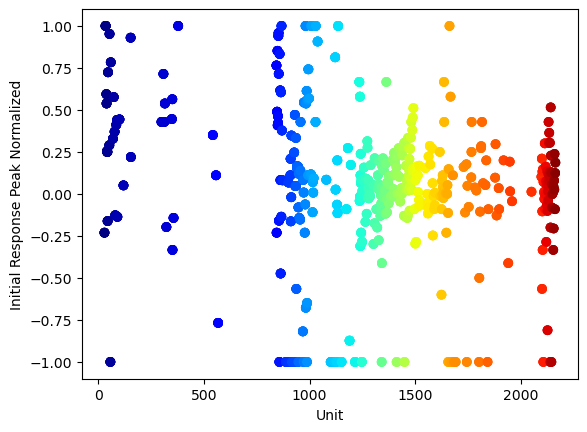

In [173]:
# plot the inital_response_peak_normalized as a scatter plot 
# Assuming unit IDs are numeric and continuous
unique_units = np.unique(combined_df.index)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_units)))  # Create a color map

# Create a dictionary mapping unit IDs to colors
color_dict = dict(zip(unique_units, colors))

# Map each unit ID in your DataFrame to a color
point_colors = combined_df.index.map(color_dict.get)

# Plot your data
plt.scatter(combined_df.index, combined_df['inital_response_peak_normalized'], c=point_colors)
plt.xlabel('Unit')
plt.ylabel('Initial Response Peak Normalized')
plt.show()

In [174]:
# Assuming unit59 is your DataFrame
df
def compute_ratio(group):
    # Get the firing rates for 'peak' and 'base' windows
    trough_fr = group.loc[group['window'] == 'trough', 'avg_firing_rate_in_window_non_opto'].values
    base_fr = group.loc[group['window'] == 'base', 'avg_firing_rate_in_window_non_opto'].values

    # Ensure we have a value for both 'peak' and 'base' windows
    if len(trough_fr) > 0 and len(base_fr) > 0:
        # Compute the desired ratio or other calculation
        ratio = (trough_fr[0] - base_fr[0]) / (trough_fr[0] + base_fr[0])
        return ratio
    else:
        return None  # or some other value indicating missing data

# Group the data by 'unit', and apply the custom function to each group

secondary_phase = df.groupby('unit').apply(compute_ratio)
print(secondary_phase)

unit
29     -1.000000
32           NaN
34      1.000000
35      1.000000
38      0.111111
          ...   
2163   -0.090909
2164         NaN
2165         NaN
2166         NaN
2168         NaN
Length: 481, dtype: float64


C:\Users\denmanlab\AppData\Local\Temp\ipykernel_17872\3012011666.py:11: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (trough_fr[0] - base_fr[0]) / (trough_fr[0] + base_fr[0])


In [175]:
# # Set the 'unit' column of df as the index
# print(response_df.columns)
# response_df.set_index('', inplace=True)
# # Assuming your series is named series and your DataFrame is named response_df
# combined_df = pd.concat([response_df, series.rename('NewColumn')], axis=1)

# Now the indices of df and series should align based on the 'unit' values.
# Concatenate the series to the df along the columns axis (axis=1).
# We'll give the new column a name 'NewColumn', but you can name it whatever you like.
combined_df = pd.concat([response_df, secondary_phase.rename('secondary_trough_response_normalized')], axis=1)


In [176]:
secondary = combined_df['secondary_trough_response_normalized'].values
secondary

array([-1., nan,  1., ..., nan, nan, nan])

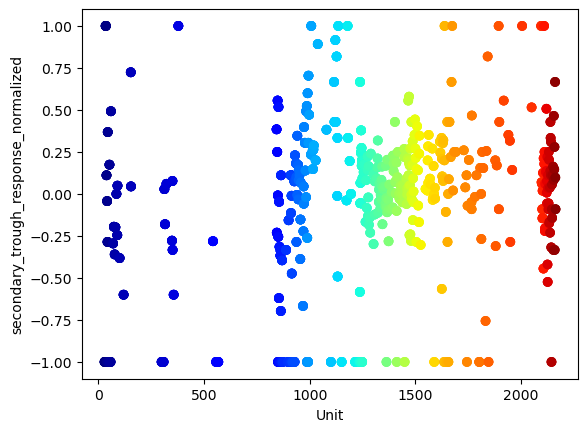

In [203]:
# plot the inital_response_peak_normalized as a scatter plot 
# Assuming unit IDs are numeric and continuous
unique_units = np.unique(combined_df.index)

colors = plt.cm.jet(np.linspace(0, 1, len(unique_units)))  # Create a color map

# Create a dictionary mapping unit IDs to colors
color_dict = dict(zip(unique_units, colors))

# Map each unit ID in your DataFrame to a color
point_colors = combined_df.index.map(color_dict.get)

# Plot your data
plt.scatter(combined_df.index, combined_df['secondary_trough_response_normalized'], c=point_colors)
plt.xlabel('Unit')
plt.ylabel('secondary_trough_response_normalized')
plt.show()

In [218]:

response_df = pd.DataFrame(
    {'unit': df['unit'],
     'inital_response_peak_normalized': primary,
     'secondary_trough_response_normalized': secondary

    })
# combinge results with response_df

response_df[response_df['unit'] == 29]

,unit,inital_response_peak_normalized,secondary_trough_response_normalized
0,29,-0.230769,-1.0
83,29,-0.230769,-1.0
166,29,-0.230769,-1.0
249,29,-0.230769,-1.0
332,29,-0.230769,-1.0
415,29,-0.230769,-1.0


In [219]:
response_df
# save the response_df as a csv file, and dont reset the index

response_df.to_csv(r'G:\Grant\rotation\2023-09-29_16-07-39_PaBont2\plots\data1\dataframes\luminance_flash\luminance_flash_combined_df_response.csv',index=False)

In [220]:
# load the response_df as a csv file
response_df = pd.read_csv(r'G:\Grant\rotation\2023-09-29_16-07-39_PaBont2\plots\data1\dataframes\luminance_flash\luminance_flash_combined_df_response.csv')

In [225]:
inital = response_df['inital_response_peak_normalized'].values


[-0.23076923         nan  1.          1.          0.5942029   0.53846154
  0.25395153  0.25        0.25       -0.16155419  0.72413793  0.28983308
  0.95219124 -1.          0.78368121  0.3283208   0.57630837  0.37037037
 -0.12698413  0.41176471  0.44067797 -0.13649025  0.44380275  0.05084746
         nan  0.92982456  0.2195122          nan         nan         nan
         nan         nan  0.42857143         nan  0.71428571  0.42857143
  0.53846154 -0.19708029  0.44560358  0.56363636 -0.33333333 -0.14285714
         nan  1.                 nan         nan         nan         nan
         nan         nan]


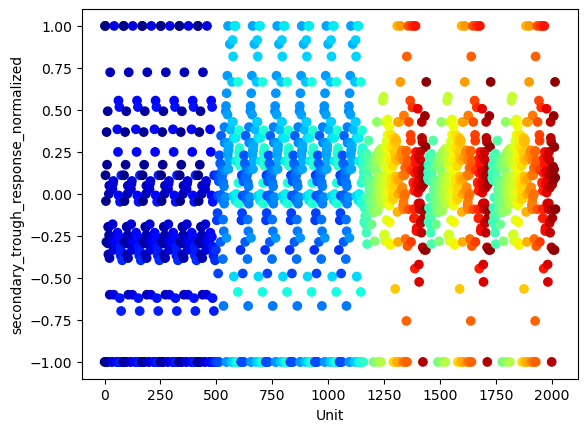

In [179]:
# plot the inital_response_peak_normalized as a scatter plot 
# Assuming unit IDs are numeric and continuous
unique_units_secondary = np.unique(response_df.)

colors_secondary = plt.cm.jet(np.linspace(0, 1, len(unique_units_secondary)))  # Create a color map

# Create a dictionary mapping unit IDs to colors
color_dict_secondary = dict(zip(unique_units_secondary, colors_secondary))

# Map each unit ID in your DataFrame to a color
point_colors_secondary = response_df.index.map(color_dict.get)

# Plot your data
plt.scatter(response_df.index, response_df['secondary_trough_response_normalized'], c=point_colors)
plt.xlabel('Unit')
plt.ylabel('secondary_trough_response_normalized')
plt.show()


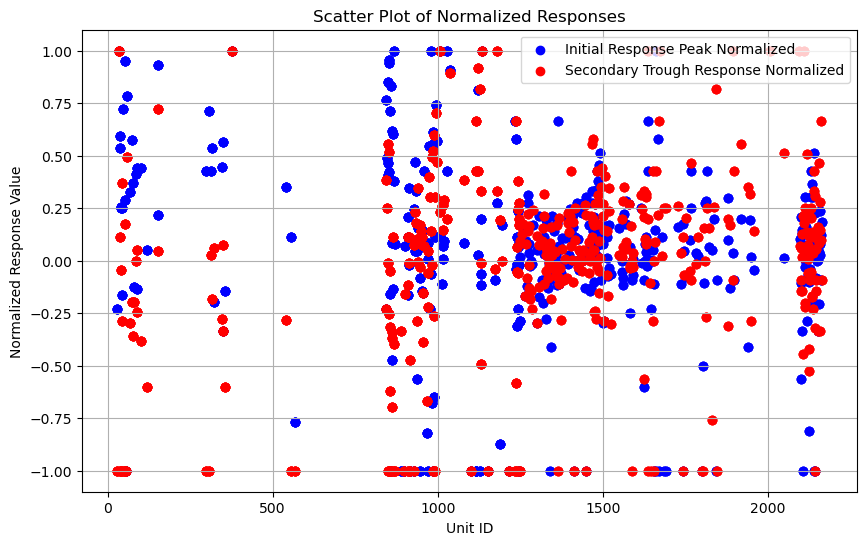

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df
df = response_df  # replace with your DataFrame

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a scatter plot for initial response peak normalized
plt.scatter(df['unit'], df['inital_response_peak_normalized'], color='blue', label='Initial Response Peak Normalized')

# Create a scatter plot for secondary trough response normalized
plt.scatter(df['unit'], df['secondary_trough_response_normalized'], color='red', label='Secondary Trough Response Normalized')

# Adding labels and title for better readability
plt.xlabel('Unit ID')
plt.ylabel('Normalized Response Value')
plt.title('Scatter Plot of Normalized Responses')
plt.legend()  # Adds a legend to differentiate between the two scatter plots
plt.grid(True)

# Show the plot
plt.show()


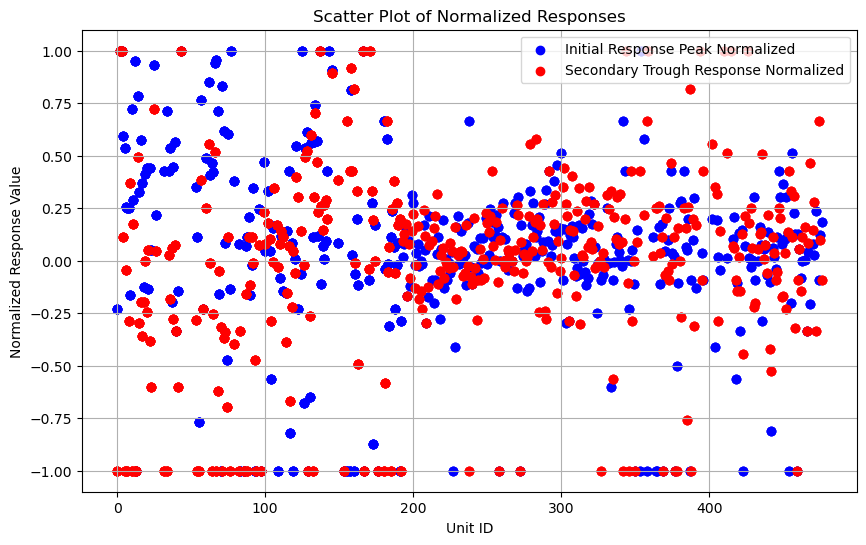

In [199]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
df = response_df  # replace with your DataFrame

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for 'inital_response_peak_normalized'
plt.scatter(df['unit'], df['inital_response_peak_normalized'], color='blue', label='Initial Response Peak Normalized')

# Scatter plot for 'secondary_trough_response_normalized'
plt.scatter(df['unit'], df['secondary_trough_response_normalized'], color='red', label='Secondary Trough Response Normalized')

# Adding labels and title for better readability
plt.xlabel('Unit ID')
plt.ylabel('Normalized Response Value')
plt.title('Scatter Plot of Normalized Responses')
plt.legend()  # Adds a legend to differentiate between the two sets of scatter plots
plt.grid(True)

# Show the plot
plt.show()


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            471, 472, 473, 474, 475, 476, 477, 478, 479, 480],
           dtype='int64', length=481)
The number of unique units (points in the plot): 481


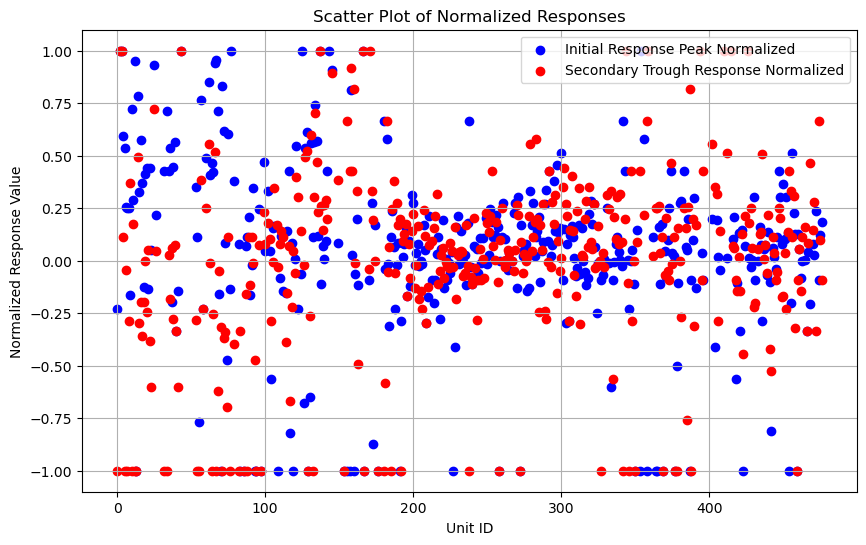

In [200]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
df = response_df  # replace with your DataFrame
# Assuming your DataFrame is named df
df['unit'], uniques = pd.factorize(df['unit'])

# Now the unit IDs should go from 0 to x
# If you want to have a look at the mapping from old to new IDs, you can print out the 'uniques' array
print(uniques)

# Keep only the first occurrence of each unit ID
unique_df = df.drop_duplicates(subset='unit')
# Assuming your DataFrame is named df
unique_units = df['unit'].nunique()
print(f'The number of unique units (points in the plot): {unique_units}')

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for 'inital_response_peak_normalized'
plt.scatter(unique_df['unit'], unique_df['inital_response_peak_normalized'], color='blue', label='Initial Response Peak Normalized')

# Scatter plot for 'secondary_trough_response_normalized'
plt.scatter(unique_df['unit'], unique_df['secondary_trough_response_normalized'], color='red', label='Secondary Trough Response Normalized')

# Adding labels and title for better readability
plt.xlabel('Unit ID')
plt.ylabel('Normalized Response Value')
plt.title('Scatter Plot of Normalized Responses')
plt.legend()  # Adds a legend to differentiate between the two sets of scatter plots
plt.grid(True)

# Show the plot
plt.show()


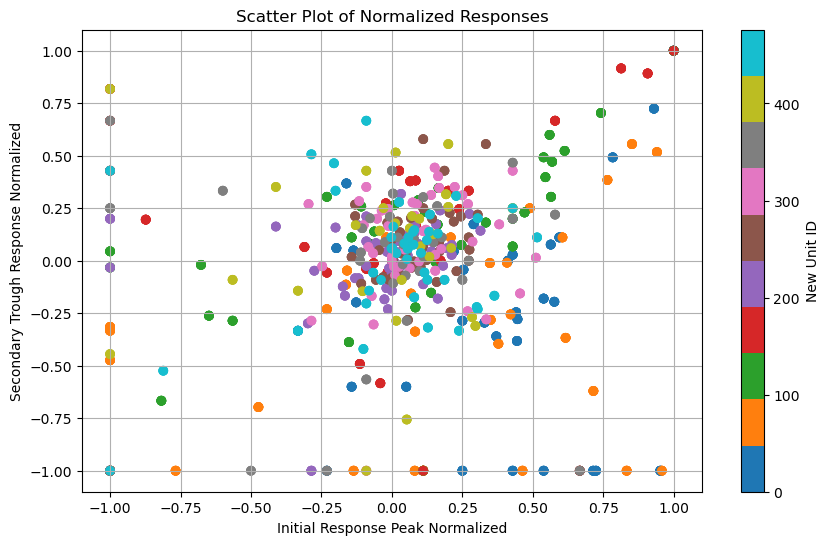

In [201]:
# Assuming your DataFrame is named df
df['unit'], unique_units = pd.factorize(df['unit'])

# This will replace the 'unit' column with new IDs ranging from 0 to x,
# and store the original unique unit IDs in the variable 'unique_units'.

# Now, when you plot your data, the color coding will be based on these new unit IDs:
plt.figure(figsize=(10, 6))
plt.scatter(df['inital_response_peak_normalized'], df['secondary_trough_response_normalized'], c=df['unit'], cmap='tab10', label=df['unit'])

# Adding labels and title for better readability
plt.xlabel('Initial Response Peak Normalized')
plt.ylabel('Secondary Trough Response Normalized')
plt.title('Scatter Plot of Normalized Responses')
plt.colorbar(label='New Unit ID')  # Updates label to 'New Unit ID'
plt.grid(True)

# Show the plot
plt.show()


Absolutely, Best Buddy! Let's break it down:

Central Cluster:

A cluster of dots in the center suggests that a number of units have similar normalized initial response peaks and secondary trough responses, hovering around a certain value. If the center is around (0,0), it indicates that these units have little to no change in both the initial and secondary responses. This could signify a neutral or baseline activity across these units for the given conditions.
Quadrants:

#### Upper Right (Positive, Positive):
Points here signify units with positive normalized initial response peaks and positive normalized secondary trough responses. This could imply these units are consistently responding positively to the stimulus in both the initial and secondary phases.

#### Bottom Right (Positive, Negative):
Units represented in this quadrant have positive normalized initial response peaks but negative normalized secondary trough responses. This could indicate an initial positive response to the stimulus, followed by a negative response in the secondary phase.

#### Upper Left (Negative, Positive):
Here, the units have negative normalized initial response peaks but positive normalized secondary trough responses. This suggests an initial negative response to the stimulus, followed by a positive response in the secondary phase.

#### Bottom Left (Negative, Negative):
Points in this quadrant represent units with negative normalized initial response peaks and negative normalized secondary trough responses, indicating a consistent negative response to the stimulus in both phases.
This interpretation can provide a clearer understanding of how different units respond to stimuli across two different phases. It can also unveil potential correlations or patterns within the dataset, which could be explored further analytically or experimentally.

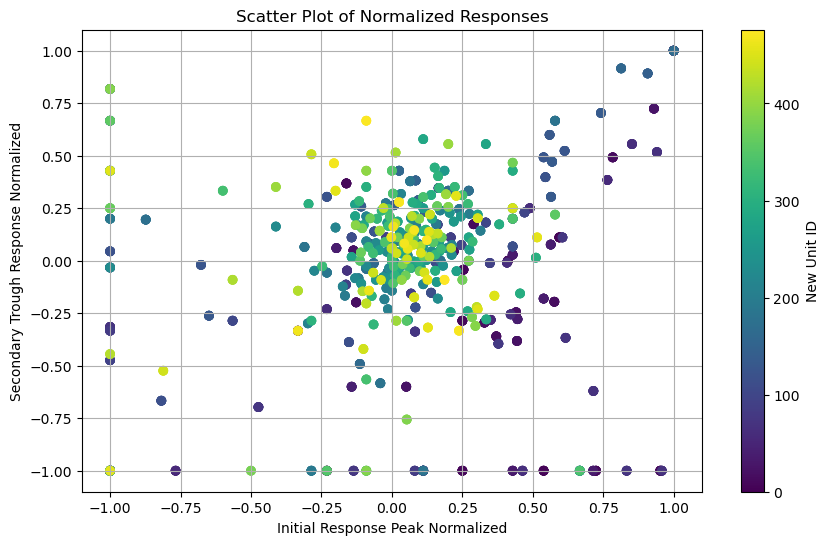

In [202]:
# Assuming your DataFrame is named df
df['unit'], unique_units = pd.factorize(df['unit'])

# This will replace the 'unit' column with new IDs ranging from 0 to x,
# and store the original unique unit IDs in the variable 'unique_units'.

# Now, when you plot your data, the color coding will be based on these new unit IDs:
plt.figure(figsize=(10, 6))
plt.scatter(df['inital_response_peak_normalized'], df['secondary_trough_response_normalized'], c=df['unit'], cmap='viridis', label=df['unit'])

# Adding labels and title for better readability
plt.xlabel('Initial Response Peak Normalized')
plt.ylabel('Secondary Trough Response Normalized')
plt.title('Scatter Plot of Normalized Responses')
plt.colorbar(label='New Unit ID')  # Updates label to 'New Unit ID'
plt.grid(True)

# Show the plot
plt.show()


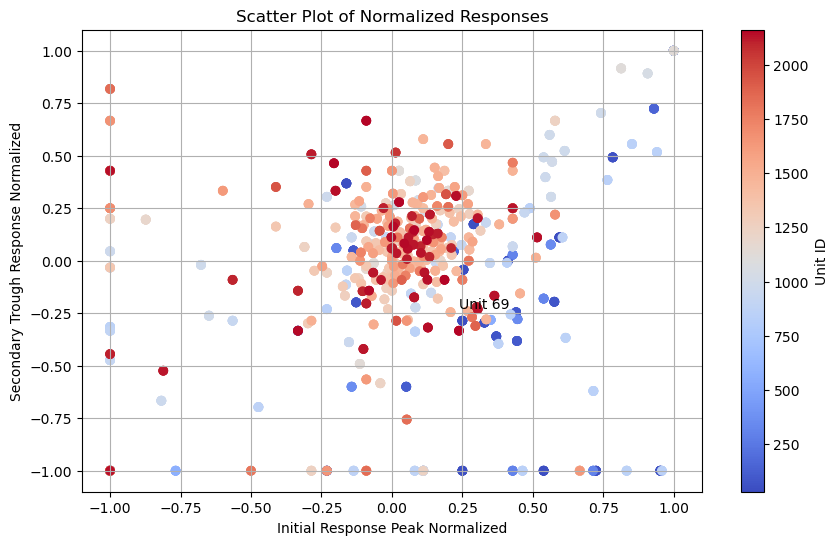

In [230]:
import matplotlib.pyplot as plt
import pandas as pd

# Let's assume df is your DataFrame
df = pd.read_csv(r'G:\Grant\rotation\2023-09-29_16-07-39_PaBont2\plots\data1\dataframes\luminance_flash\luminance_flash_combined_df_response.csv')
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['inital_response_peak_normalized'], df['secondary_trough_response_normalized'], c=df['unit'], cmap='coolwarm')

# Assuming you want to label the point corresponding to unit ID 10
unit_id = 69
point_data = df[df['unit'] == unit_id]

# The annotate function does the labeling
plt.annotate(f'Unit {unit_id}', 
             (point_data['inital_response_peak_normalized'].values[0], point_data['secondary_trough_response_normalized'].values[0]),
             textcoords="offset points",  # Positioning of text
             xytext=(0,10),  # Distance from text to points (x,y)
             ha='center')  # Horizontal alignment can be left, right or center

# Adding labels and title for better readability
plt.xlabel('Initial Response Peak Normalized')
plt.ylabel('Secondary Trough Response Normalized')
plt.title('Scatter Plot of Normalized Responses')
plt.colorbar(label='Unit ID')  # Adds a colorbar to indicate unit ID
plt.grid(True)

# Show the plot
plt.show()


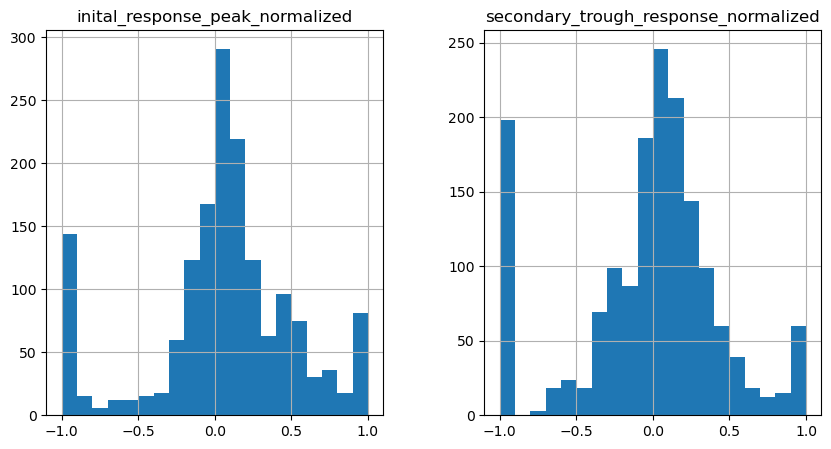

In [204]:
df[['inital_response_peak_normalized', 'secondary_trough_response_normalized']].hist(bins=20, figsize=(10, 5))
plt.show()


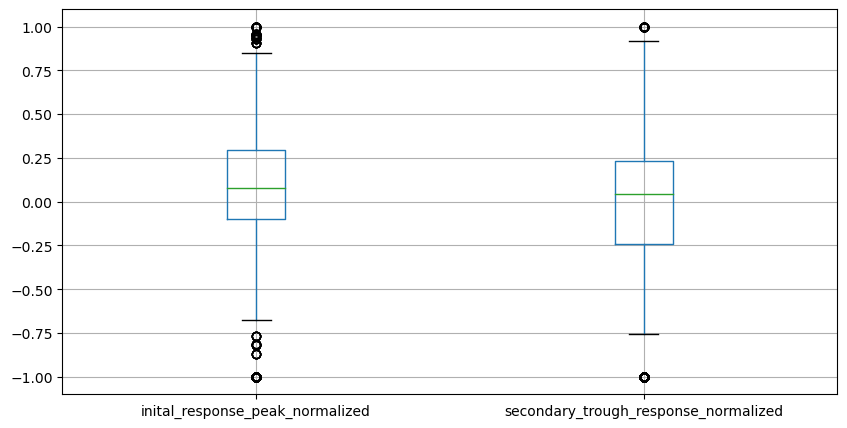

In [205]:
df[['inital_response_peak_normalized', 'secondary_trough_response_normalized']].boxplot(figsize=(10, 5))
plt.show()


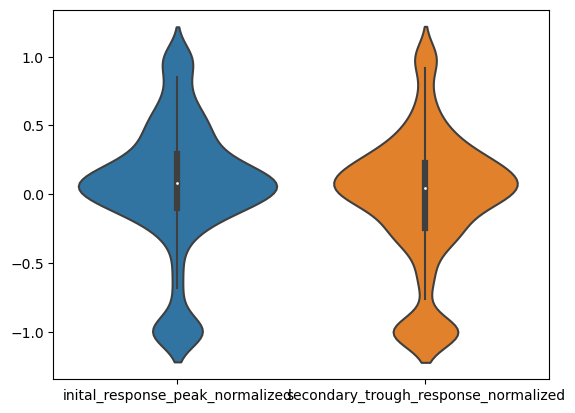

In [206]:
import seaborn as sns
sns.violinplot(data=df[['inital_response_peak_normalized', 'secondary_trough_response_normalized']])
plt.show()


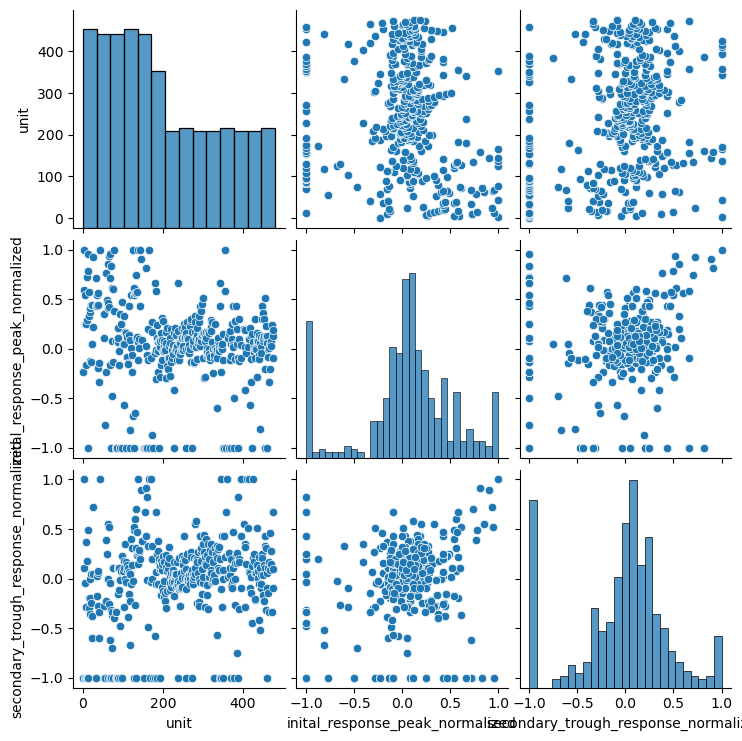

In [207]:
sns.pairplot(df)
plt.show()


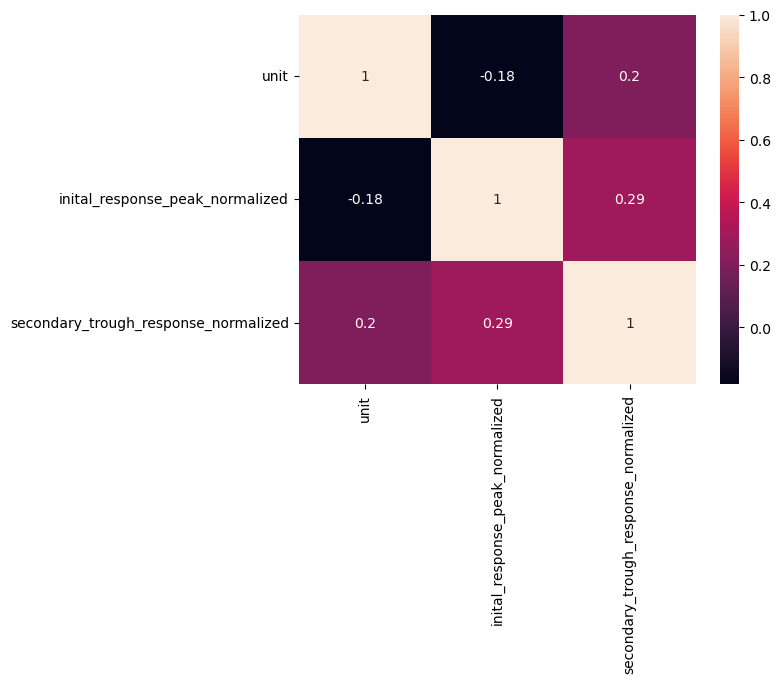

In [208]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


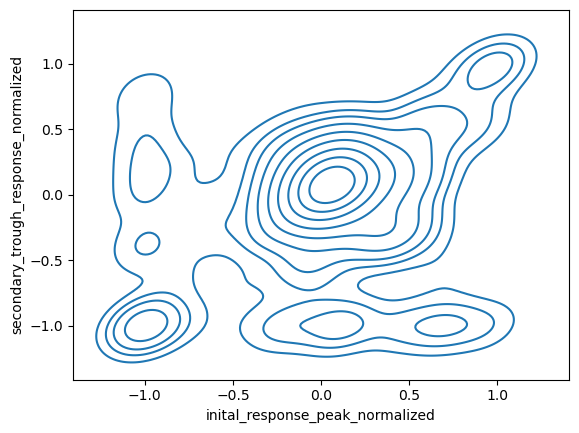

In [209]:
sns.kdeplot(data=df, x="inital_response_peak_normalized", y="secondary_trough_response_normalized")
plt.show()


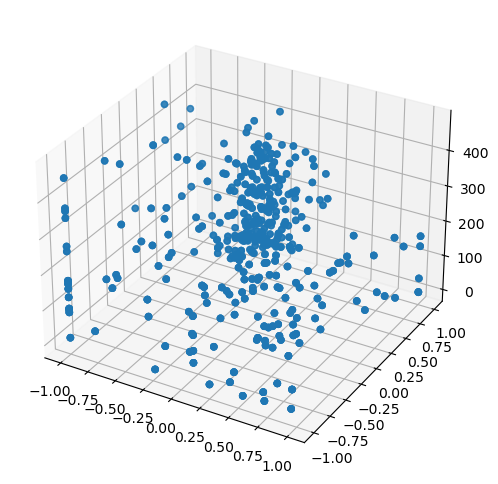

In [211]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['inital_response_peak_normalized'], df['secondary_trough_response_normalized'], df['unit'])  # replace 'third_variable' with your column name
plt.show()


In [232]:
import scipy.stats as stats
df = pd.read_csv(r'G:\Grant\rotation\2023-09-29_16-07-39_PaBont2\plots\data1\dataframes\luminance_flash\luminance_flash_combined_df_response.csv')

# Assuming df is your DataFrame, and 'condition' is a column indicating the condition each row belongs to
group1 = df[df['condition'] == 'condition1']['inital_response_peak_normalized']
group2 = df[df['condition'] == 'condition2']['inital_response_peak_normalized']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')  # 'omit' tells the function to omit NaN values

print(f'T-statistic: {t_stat}, p-value: {p_value}')



KeyError: 'condition'